In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
Organism = ['hg38', 'mm10']

for organism in Organism:
    infile = '../resources/experimentList_{}_TFs_only_QC_filtered.tab'.format(organism)
    experiment_table = pd.read_csv(infile, sep='\t', index_col=0)

[]

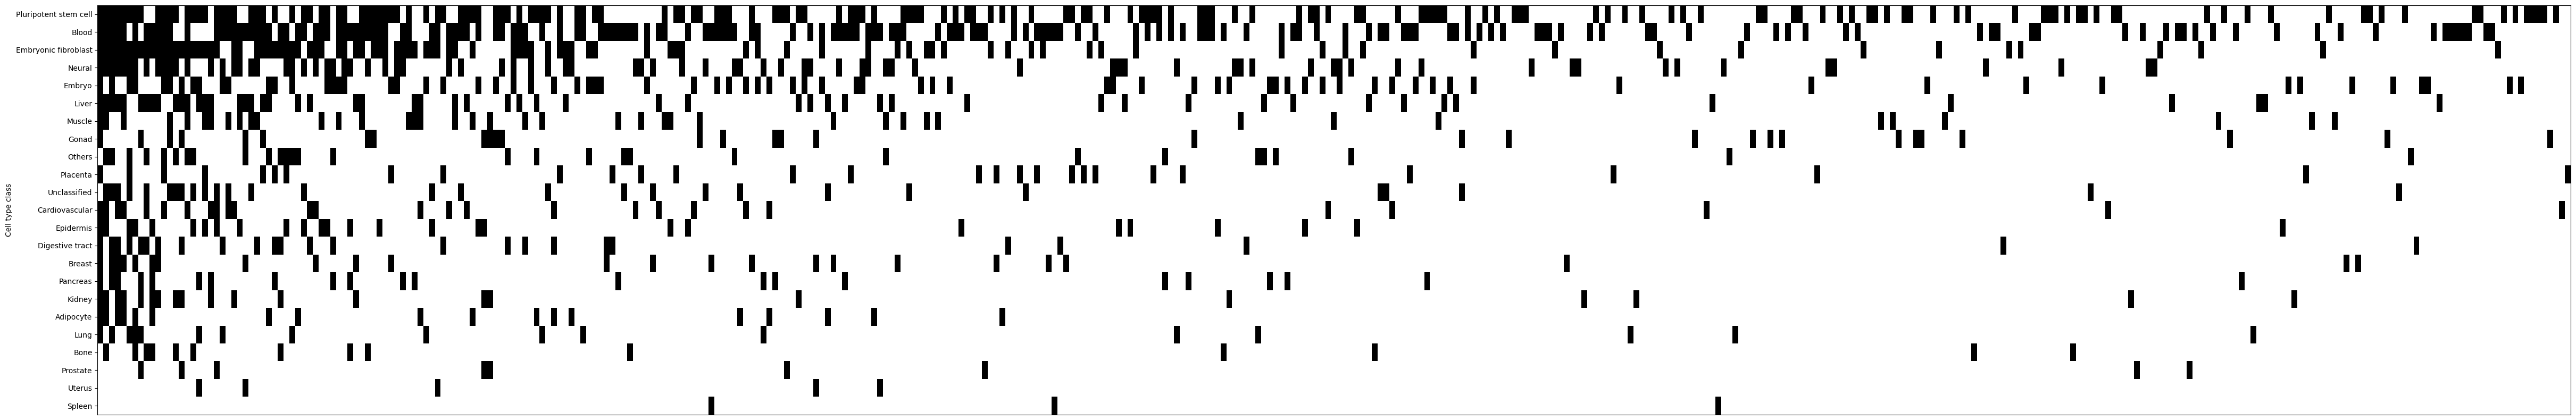

In [59]:
celltype_per_tf = experiment_table.pivot_table(index='antigen', columns='celltype_class', aggfunc='size', fill_value=0)

celltype_per_tf[celltype_per_tf >0] = 1
col_idx = np.argsort(celltype_per_tf.sum(0).values)[::-1]
row_idx = np.argsort(celltype_per_tf.sum(1).values)[::-1]

celltype_per_tf = celltype_per_tf.iloc[row_idx, col_idx]

# plot
fig, ax = plt.subplots(figsize=(60,10))
im = ax.imshow(celltype_per_tf.transpose(), cmap='binary', interpolation='nearest', aspect='auto')
ax.set_ylabel('Cell type class')
ax.set_yticks(np.arange(len(celltype_per_tf.columns)))
ax.set_yticklabels(celltype_per_tf.columns)
ax.set_xticks([])

array([20, 22, 19,  2, 12,  0, 10, 16,  3,  5,  8,  4, 21, 17, 15,  9, 13,
       11,  6, 14,  7,  1, 18])

In [31]:
celltype_per_tf

celltype_class,Adipocyte,Blood,Bone,Breast,Cardiovascular,Digestive tract,Embryo,Embryonic fibroblast,Epidermis,Gonad,...,Muscle,Neural,Others,Pancreas,Placenta,Pluripotent stem cell,Prostate,Spleen,Unclassified,Uterus
antigen,,,,,,,,,,,,,,,,,,,,,
Adnp,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Aebp2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Ahr,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Aire,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Ar,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zic1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
Zic2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
Zic3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
